In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kospi = pd.read_csv("kospi_data.csv")

In [3]:
kospi

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


# 1

H0: 11월 12월의 평균 월간 수익률이 다른 달보다 크다.
H1: 그렇지 않다.

가설 검정 방법 : t테스트 / p-value

In [6]:
#로그 수익률
kospi['Close_lag'] = kospi['Close'].shift(1)
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])
kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


In [7]:
#월간 수익률
kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

In [9]:
kospi_df = pd.DataFrame({'Year':kospi['Year'], 'Month':kospi['Month']}).drop_duplicates(['Year', 'Month'])
kospi_df

,Year,Month
0,1981,5
24,1981,6
49,1981,7
75,1981,8
100,1981,9
...,...,...
10919,2022,4
10940,2022,5
10961,2022,6
10981,2022,7


In [11]:
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
rate

Year  Month
1981  5        0.021609
      6        0.177294
      7       -0.018067
      8       -0.055531
      9       -0.057284
                 ...   
2022  4       -0.022962
      5       -0.003401
      6       -0.141015
      7        0.049699
      8        0.008348
Name: Log_Rate, Length: 496, dtype: float64

In [15]:
kospi_df['Monthly_Rate'] = list(rate)
kospi_df

,Year,Month,Monthly_Rate
0,1981,5,0.021609
24,1981,6,0.177294
49,1981,7,-0.018067
75,1981,8,-0.055531
100,1981,9,-0.057284
...,...,...,...
10919,2022,4,-0.022962
10940,2022,5,-0.003401
10961,2022,6,-0.141015
10981,2022,7,0.049699


<AxesSubplot:xlabel='Month'>

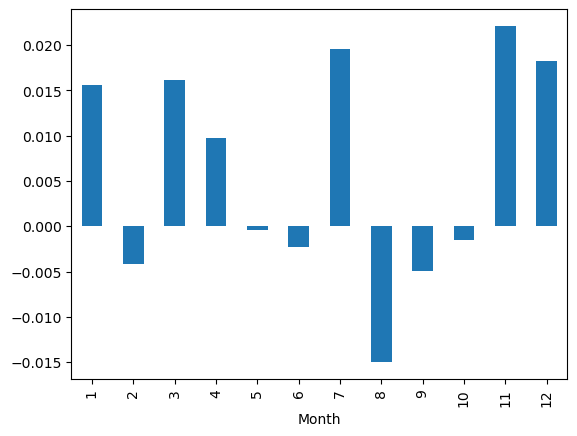

In [14]:
#모든 년도에서 동일 연도끼리 
kospi_df.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar')

In [ ]:
# p-value

#11, 12월 모평균 / 다른 달 모평균 계산

# 1981 ~ 2022 까지 41개의 표본 존재. ( n>= 30 이므로 CLT, 정규분포라 가정, s)


In [33]:
# 1981은 5월부터 있으므로  1982부터 시작하겠음.
kospi_df[(kospi_df['Year'] == 1982)]

,Year,Month,Monthly_Rate
195,1982,1,-0.043985
219,1982,2,0.024605
243,1982,3,-0.007404
268,1982,4,-0.051610
293,1982,5,-0.057905
317,1982,6,0.076188
343,1982,7,0.011579
369,1982,8,-0.025424
395,1982,9,-0.018457
421,1982,10,0.018211


<AxesSubplot:xlabel='Month'>

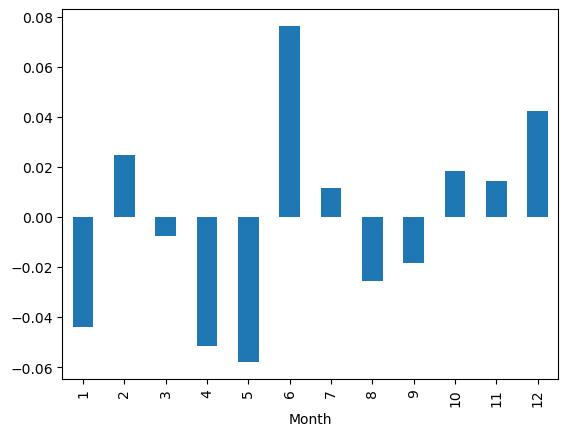

In [35]:
kospi_df[(kospi_df['Year'] == 1982)].groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar')
# 바 차트

In [32]:
kospi_df.dtypes

Year              int64
Month             int64
Monthly_Rate    float64
dtype: object